In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
rideData2015 = pd.read_csv('rideData2015.csv')
rideData2016 = pd.read_csv('rideData2016.csv')
rideData2017 = pd.read_csv('rideData2017.csv')
rideData2018 = pd.read_csv('rideData2018.csv')
rideData2019 = pd.read_csv('rideData2019.csv')
rideData2020 = pd.read_csv('rideData2020.csv')
rideData2021 = pd.read_csv('rideData2021.csv')

In [3]:
data_list = [rideData2015, rideData2016, rideData2017, rideData2018, rideData2019, rideData2020, rideData2021]
data = pd.DataFrame()
for i in range(len(data_list)):
    data = pd.concat([data, data_list[i]])
data = data.reset_index().drop(columns = ['index', 'Unnamed: 0'])

In [4]:
data.columns

Index(['date', 'datetime', 'SACTMIN', 'SPOSTMIN', 'Ride_name', 'Park_location',
       'Park_area', 'Ride_type_all', 'Ride_type_thrill', 'Ride_type_spinning',
       ...
       'HSFIREWKS', 'AKPRDDAY', 'AKPRDDT1', 'AKPRDDT2', 'AKPRDDN', 'AKFIREN',
       'AKSHWNGT', 'AKSHWNT1', 'AKSHWNT2', 'AKSHWNN'],
      dtype='object', length=211)

In [5]:
for column in data.columns:
    print(column)

date
datetime
SACTMIN
SPOSTMIN
Ride_name
Park_location
Park_area
Ride_type_all
Ride_type_thrill
Ride_type_spinning
Ride_type_slow
Ride_type_small_drops
Ride_type_big_drops
Ride_type_dark
Ride_type_scary
Ride_type_water
Fast_pass
Classic
Age_interest_all
Age_interest_preschoolers
Age_interest_kids
Age_interest_tweens
Age_interest_teens
Age_interest_adults
Height_req_inches
Ride_duration_min
Open_date
Age_of_ride_days
Age_of_ride_years
TL_rank
TA_Stars
WDW_TICKET_SEASON
DAYOFWEEK
DAYOFYEAR
WEEKOFYEAR
MONTHOFYEAR
YEAR
SEASON
HOLIDAYPX
HOLIDAYM
HOLIDAYN
HOLIDAY
WDWTICKETSEASON
WDWRaceN
WDWeventN
WDWevent
WDWrace
WDWSEASON
WDWMAXTEMP
WDWMINTEMP
WDWMEANTEMP
MKeventN
MKevent
EPeventN
EPevent
HSeventN
HSevent
AKeventN
AKevent
HOLIDAYJ
inSession
inSession_Enrollment
inSession_wdw
inSession_dlr
inSession_sqrt_WDW
inSession_sqrt_DLR
inSession_California
inSession_DC
inSession_Central_FL
inSession_Drive1_FL
inSession_Drive2_FL
inSession_Drive_CA
inSession_Florida
inSession_Mardi_Gras
inSession_Mid

Due to the time it takes to look at all years at once, for this EDA notebook, we will just look at 2018 data.

In [5]:
rideData2018 = pd.read_csv('rideData2018.csv')

First, let's look at posted wait times and actual wait times.

In [6]:
# removing -999 values missing
# removing nan
rideData2018_waits = rideData2018[rideData2018['SPOSTMIN'] != -999]

In [7]:
rideData2018_waits['SACTMIN'].describe()

count    12526.000000
mean        19.351429
std         21.145720
min          0.000000
25%          8.000000
50%         15.000000
75%         26.000000
max       1511.000000
Name: SACTMIN, dtype: float64

In [8]:
rideData2018_waits['SPOSTMIN'].describe()

count    824950.000000
mean         36.085010
std          29.298095
min           0.000000
25%          15.000000
50%          30.000000
75%          50.000000
max         330.000000
Name: SPOSTMIN, dtype: float64

(0.0, 200.0)

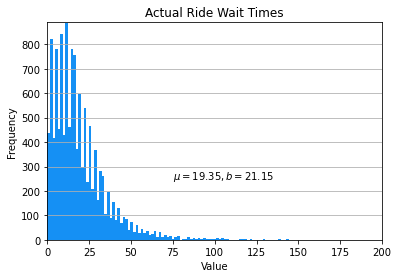

In [9]:
actual_wait_times = rideData2018_waits['SACTMIN']
# color = the blue of Cinderella's dress
n, bins, patches = plt.hist(x=actual_wait_times, bins='auto', color = '#1590f4')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Actual Ride Wait Times')
plt.text(75, 250, r'$\mu=19.35, b=21.15$')
maxfreq = n.max()

plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# limiting the x axis for visibility
plt.xlim(xmin = 0, xmax = 200)

(0.0, 200.0)

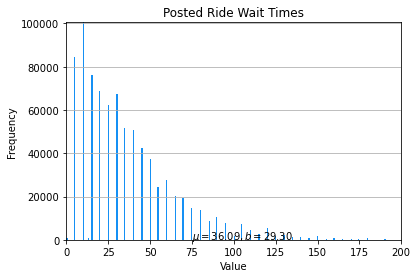

In [10]:
posted_wait_times = rideData2018_waits['SPOSTMIN']
# color = the blue of Cinderella's dress
n, bins, patches = plt.hist(x=posted_wait_times, bins='auto', color = '#1590f4')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Posted Ride Wait Times')
plt.text(75, 250, r'$\mu=36.09, b=29.30$')
maxfreq = n.max()

plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# limiting the x axis for visibility
plt.xlim(xmin = 0, xmax = 200)

We can see that the mean wait times vary greatly between the actual and posted. Let's do a t-test to see if the two groups really differ. 

In [11]:
group1 = rideData2018_waits['SPOSTMIN']
group2 = rideData2018_waits['SACTMIN']

ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

Ttest_indResult(statistic=87.3038825611486, pvalue=0.0)

The posted and actual wait times are significantly different.

Now let's look at some quantitative variables we think might correlate with actual wait times. 

Time of year/month/week not available.

In [12]:
rideData2018_waits[['SACTMIN', 'SPOSTMIN', 'Height_req_inches', 'Ride_duration_min', 'Age_of_ride_days', 'Age_of_ride_years', 
              'TL_rank', 'TA_Stars']].corr().style.background_gradient(cmap="Blues")

,SACTMIN,SPOSTMIN,Height_req_inches,Ride_duration_min,Age_of_ride_days,Age_of_ride_years,TL_rank,TA_Stars
SACTMIN,1.000000,nan,0.196052,-0.094379,-0.140925,-0.140925,-0.174114,0.123535
SPOSTMIN,nan,1.000000,0.354914,0.028759,-0.188840,-0.188840,-0.380422,0.201959
Height_req_inches,0.196052,0.354914,1.000000,-0.059237,-0.251423,-0.251423,-0.332672,0.073030
Ride_duration_min,-0.094379,0.028759,-0.059237,1.000000,0.292407,0.292407,-0.474764,0.200266
Age_of_ride_days,-0.140925,-0.188840,-0.251423,0.292407,1.000000,1.000000,-0.192821,0.062333
Age_of_ride_years,-0.140925,-0.188840,-0.251423,0.292407,1.000000,1.000000,-0.192821,0.062333
TL_rank,-0.174114,-0.380422,-0.332672,-0.474764,-0.192821,-0.192821,1.000000,-0.528374
TA_Stars,0.123535,0.201959,0.073030,0.200266,0.062333,0.062333,-0.528374,1.000000


Required height and TA stars correlate the most, but still not a strong relationship.

Now let's compare the wait times between some boolean variables, seeing if there is a significant difference between them.

In [13]:
group1 = rideData2018_waits[rideData2018_waits['Ride_type_thrill'] == True]['SACTMIN']
group2 = rideData2018_waits[rideData2018_waits['Ride_type_thrill'] == False]['SACTMIN']

ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

Ttest_indResult(statistic=25.204917280210772, pvalue=2.974094234260892e-134)

In [14]:
group1 = rideData2018_waits[rideData2018_waits['Ride_type_spinning'] == True]['SACTMIN']
group2 = rideData2018_waits[rideData2018_waits['Ride_type_spinning'] == False]['SACTMIN']

ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

Ttest_indResult(statistic=-19.615152973468227, pvalue=5.652283903794417e-83)

In [15]:
group1 = rideData2018_waits[rideData2018_waits['Ride_type_slow'] == True]['SACTMIN']
group2 = rideData2018_waits[rideData2018_waits['Ride_type_slow'] == False]['SACTMIN']

ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

Ttest_indResult(statistic=-19.35061744696635, pvalue=7.68310350152663e-82)

In [16]:
group1 = rideData2018_waits[rideData2018_waits['Ride_type_small_drops'] == True]['SACTMIN']
group2 = rideData2018_waits[rideData2018_waits['Ride_type_small_drops'] == False]['SACTMIN']

ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

Ttest_indResult(statistic=16.388546936737136, pvalue=1.2669682435557811e-59)

In [17]:
group1 = rideData2018_waits[rideData2018_waits['Ride_type_big_drops'] == True]['SACTMIN']
group2 = rideData2018_waits[rideData2018_waits['Ride_type_big_drops'] == False]['SACTMIN']

ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

Ttest_indResult(statistic=11.53372650352807, pvalue=6.136725251161919e-30)

In [18]:
group1 = rideData2018_waits[rideData2018_waits['Ride_type_dark'] == True]['SACTMIN']
group2 = rideData2018_waits[rideData2018_waits['Ride_type_dark'] == False]['SACTMIN']

ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

Ttest_indResult(statistic=3.081613073555845, pvalue=0.0020707134792277327)

In [19]:
group1 = rideData2018_waits[rideData2018_waits['Ride_type_water'] == True]['SACTMIN']
group2 = rideData2018_waits[rideData2018_waits['Ride_type_water'] == False]['SACTMIN']

ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

Ttest_indResult(statistic=5.75490345010708, pvalue=1.2462347841021638e-08)

In [20]:
group1 = rideData2018_waits[rideData2018_waits['Fast_pass'] == True]['SACTMIN']
group2 = rideData2018_waits[rideData2018_waits['Fast_pass'] == False]['SACTMIN']

ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

Ttest_indResult(statistic=32.060393882181636, pvalue=1.5377023504012654e-199)

In [21]:
group1 = rideData2018_waits[rideData2018_waits['Classic'] == True]['SACTMIN']
group2 = rideData2018_waits[rideData2018_waits['Classic'] == False]['SACTMIN']

ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

Ttest_indResult(statistic=-1.0120176070836657, pvalue=0.31155224609603277)

Looks like there are significant wait time differences between all of them.

Now let's visualize the distributions of wait times across all the rides

In [22]:
boxplot_data = []
box_labels = []
for ride in list(set(rideData2018_waits['Ride_name'])):
    boxplot_data.append(list(rideData2018_waits[rideData2018_waits['Ride_name'] == ride]['SACTMIN'].dropna()))
    box_labels.append(ride)

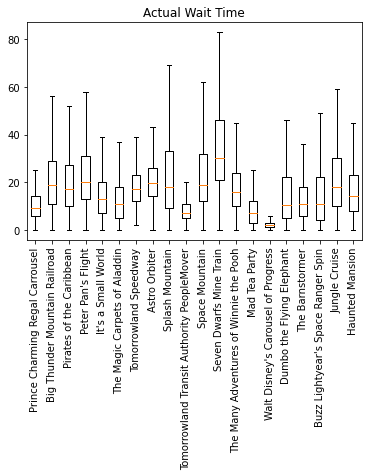

In [33]:
plt.boxplot(boxplot_data, showfliers=False, labels = box_labels)
plt.xticks(rotation = 90)
plt.title('Actual Wait Time')
plt.show()